In [0]:
%matplotlib inline

import io
import numpy as np
import pandas as pd

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [0]:
seed = 42
np.random.seed(seed=seed)

In [3]:
uploaded = files.upload()

Saving height_weight.csv to height_weight (2).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['height_weight.csv']), sep=',', encoding='utf-8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
height    100 non-null float64
weight    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
df.describe()

,height,weight
count,100.000000,100.000000
mean,168.963000,69.866000
std,9.080934,11.641958
min,143.800000,47.700000
25%,164.000000,61.200000
50%,168.700000,68.600000
75%,174.100000,76.725000
max,188.500000,108.400000


In [7]:
df.head()

,height,weight
0,143.8,57.6
1,150.1,58.2
2,150.4,54.5
3,150.9,47.7
4,152.4,55.8


In [0]:
xtr, xte, ytr, yte = train_test_split(
    df['height'].values,
    df['weight'].values,
    test_size=0.2,
    random_state=seed,
    shuffle=False
)

In [9]:
print('Train X: ', xtr.shape)
print('Test X: ', xte.shape)
print('Train Y: ', ytr.shape)
print('Test Y: ', yte.shape)

Train X:  (80,)
Test X:  (20,)
Train Y:  (80,)
Test Y:  (20,)


In [0]:
z = np.polyfit(xtr, ytr, 1)
p = np.poly1d(z)

In [0]:
plt.rcParams['figure.figsize'] = (16, 8)

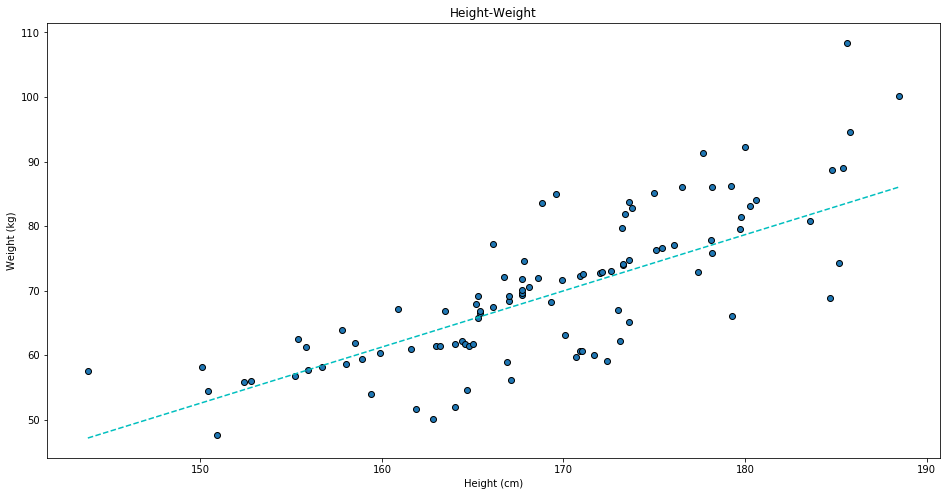

In [12]:
plt.figure()
plt.scatter(df['height'], df['weight'], edgecolor='k')
plt.plot(df['height'], p(df['height']), 'c--')
plt.title('Height-Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [0]:
xtr = xtr.reshape(-1, 1)
xte = xte.reshape(-1, 1)

In [0]:
lnr = LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=-1
)

In [15]:
lnr.fit(
    X=xtr,
    y=ytr
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [16]:
print('R-squared: ', lnr.score(xte, yte))

R-squared:  0.011757007177093715


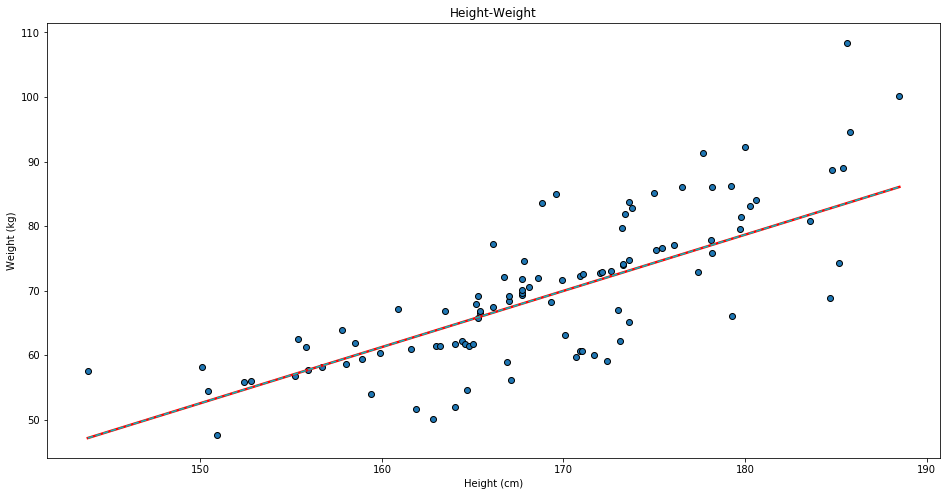

In [23]:
plt.figure()
plt.scatter(df['height'], df['weight'], edgecolor='k')
plt.plot(df['height'], lnr.predict(df['height'].values.reshape(-1, 1)), 'r')
plt.plot(df['height'], p(df['height']), 'c--')
plt.title('Height-Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()